## Import the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data Collection and Processing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv(r"C:\Users\mcr\Desktop\datasets\cardata.csv")
car_dataset.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [3]:
# Checking the number of rows and columns
car_dataset.shape

(301, 9)

In [4]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Checking the number is missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Encoding the Categorical Data

In [7]:
## Encoding "Fuel_Type" Column
car_dataset.replace({"Fuel_Type": {"Petrol":0, "Diesel":1,"CNG":2}}, inplace = True)

## Encoding "Seller_Type" Column
car_dataset.replace({"Seller_Type": {"Dealer":0, "Individual":1}}, inplace = True)

## Encoding "Transmission" Column
car_dataset.replace({"Transmission": {"Manual":0, "Automatic":1}}, inplace = True)

C:\Users\mcr\AppData\Local\Temp\ipykernel_13616\4265053685.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Fuel_Type": {"Petrol":0, "Diesel":1,"CNG":2}}, inplace = True)
C:\Users\mcr\AppData\Local\Temp\ipykernel_13616\4265053685.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Seller_Type": {"Dealer":0, "Individual":1}}, inplace = True)
C:\Users\mcr\AppData\Local\Temp\ipykernel_13616\4265053685.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

In [8]:
car_dataset.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0


# Splitting the data and Target

In [9]:
x = car_dataset.drop(["Car_Name","Selling_Price"], axis = 1)
y = car_dataset["Selling_Price"]

In [10]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [11]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


## Splitting Training and Test data

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state = 2)

## Model Training
* Linear Regression

In [13]:
# Loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

In [14]:
# Prediction on Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [15]:
# R Squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared error :",error_score)

R squared error : 0.8799451660493701


## Visualize the actual prices and Predicted prices

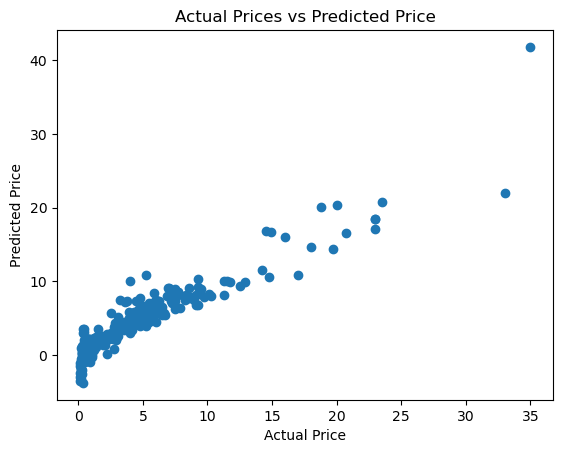

In [16]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

In [17]:
# Prediction on Training data
test_data_prediction = lin_reg_model.predict(x_test)

In [18]:
# R squared Error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.836576671502687


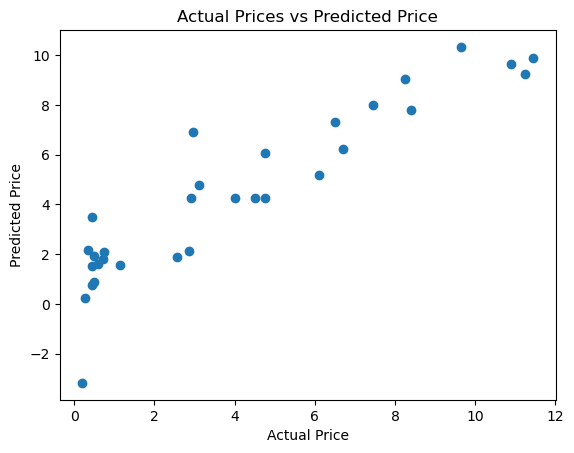

In [19]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()

## Lasso Regression

In [20]:
# Loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(x_train,y_train)

Lasso()

## Model Evaluation

In [21]:
# Prediction on Training data
test_data_prediction = lass_reg_model.predict(x_test)

In [22]:
# R squared Error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.8709167941173195


## Visualize the actual prices and Predicted prices

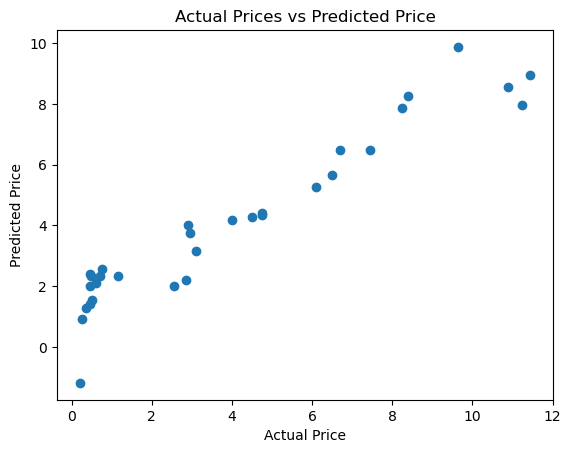

In [23]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")
plt.show()